## Week 6: Dimensionality Reduction (PCA) and Model Validation

**(1a) Load the data file 'data1.csv' and visualize the data using a scatter plot.**

Text(0.5, 1.0, 'Scatter plot of data')

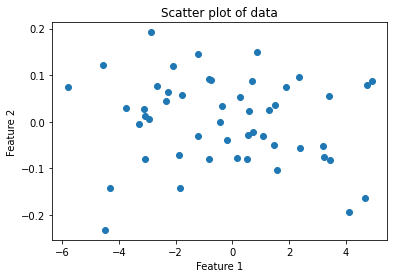

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('data1.csv',header=None)
plt.scatter(data[0],data[1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of data')

**Let $\bar{x} = (x_1, x_2, x_3, \cdots, x_m)$ denote a data point with $m$ features. Suppose we approximate $\bar{x}$ with fewer features, say two features $x_1$ and $x_2$, as $\bar{y} = (x_1, x_2, 0, \cdots, 0)$. Now, define the loss due to the representation as $\lVert \bar{x} - \bar{y} \rVert^2 = x_3^2 + \cdots + x_m^2$. **

**(1b) Find a single feature representation of the data (in data1.csv) such that the loss in representation is minimum.**

In [3]:
def loss_representation(data):
  a=[]
  for i in range(data.shape[1]):
    a.append((data[i]**2).sum())
  return a
print('loss in representation for two columns',loss_representation(data))
print('single feature representation \n',data[0])

loss in representation for two columns [358.1035064241587, 0.4191265524458239]
single feature representation 
 0    -3.086760
1     2.368870
2    -0.741769
3    -1.221298
4    -2.080397
5    -4.326320
6     4.123034
7    -2.652204
8     0.499932
9    -0.838980
10   -2.858644
11   -2.267901
12    4.917435
13    1.283584
14    0.710533
15    3.442049
16    1.558618
17   -1.207792
18   -0.434896
19    3.233355
20   -2.336237
21    4.675850
22    3.196917
23   -1.884340
24    1.071762
25   -1.795013
26    1.452185
27   -5.808152
28   -3.093698
29   -3.743410
30    4.738467
31    0.580810
32   -0.385729
33   -3.283418
34    0.561406
35    0.689401
36    3.386773
37   -2.955412
38    2.350010
39   -0.812667
40    0.247852
41    1.499923
42   -1.841450
43   -3.124917
44   -4.578724
45   -0.202483
46    1.868510
47    0.866679
48   -4.508619
49    0.170737
Name: 0, dtype: float64


### So the loss is minimum if second feature is removed which is 0.419
### Hence the single feature representation is column 1

**(1c) Visualize the approximated data and compare it with the original data using scatter plot**

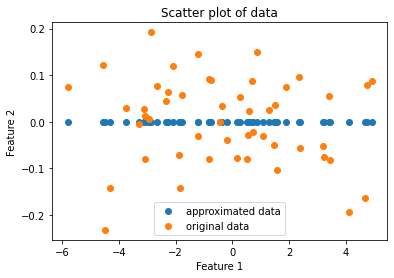

In [ ]:
plt.scatter(data[0],np.zeros(50));
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of data')
plt.scatter(data[0],data[1])
plt.legend(['approximated data','original data']);

**(2a) Load the data file 'data2.csv'.**

In [44]:
data_2=pd.read_csv('data2.csv',header=None)
data_2

,0,1,2,3
0,0.007589,-8.886696,-12.316361,-0.036092
1,-1.461927,3.977425,-17.784232,0.075197
2,-0.891625,-7.426320,25.122113,-0.150440
3,1.057471,4.184783,39.927021,0.068328
4,0.147645,-0.309380,33.502600,-0.125913
...,...,...,...,...
995,-1.881842,3.712485,11.849708,-0.066713
996,0.914472,5.272099,-21.545739,0.042019
997,-0.077867,2.899303,-12.374721,0.044212
998,-0.280726,-11.504575,-17.164410,0.079759


**(2c) Plot the minimum representation loss as a function of the number of features used for representation. Vary the number of features from 0 to 3**



In [45]:
loss_=loss_representation(data_2)
loss=np.array(loss_)

### If Zero features loss is sum of all losses

In [46]:
loss_features=[]
loss_features.append(sum(loss))

## For features 1 to 3:

([<matplotlib.axis.XTick at 0x7f1d49a57710>,
 <a list of 4 Text major ticklabel objects>)

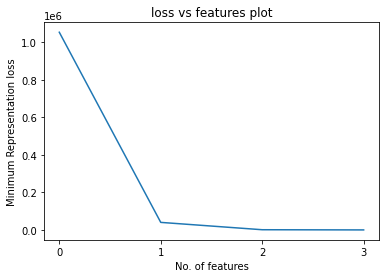

In [47]:

for i in range(1,4):
  loss[loss.argmax()]=0
  loss_features.append(sum(loss))
plt.plot([0,1,2,3],loss_features)
plt.xlabel('No. of features')
plt.ylabel('Minimum Representation loss')
plt.title('loss vs features plot')
plt.xticks([0,1,2,3])

**(2c) Order the features in decreasing order of significance (with respect to the representation loss).**

In [48]:
loss_

[990.7130563191936, 39148.26477490312, 1013388.6230866604, 5.105685170912927]

## Significance order 

In [49]:
order=[]
loss=np.array(loss_)
for i in range(len(loss)):
  order.append(loss.argmax())
  loss[loss.argmax()]=0
order

[2, 1, 0, 3]

**(2d) Compute the covariance matrix of the data. Give your observations between the values in covariance matrix and feature importance obtained in (2c).**

In [50]:
def covariance(x,y):
  x_mean=np.mean(x)
  y_mean=np.mean(y)
  ans=0
  for i in range(len(x)):
    ans=ans+((x[i]-x_mean)*(y[i]-y_mean))/(len(x)-1)
  return ans
def covariance_matrix(data):
  a=np.zeros((data.shape[1],data.shape[1]))
  for i in range(data.shape[1]):
    for j in range(data.shape[1]):
      a[i][j]=covariance(data[i],data[j])
  return a
pd.DataFrame(covariance_matrix(data_2))

,0,1,2,3
0,0.987196,-0.057179,-0.140991,0.003057
1,-0.057179,39.182190,0.116676,-0.007770
2,-0.140991,0.116676,1008.989796,0.055835
3,0.003057,-0.007770,0.055835,0.005093


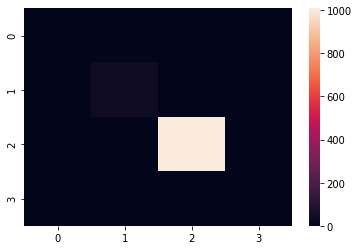

In [51]:
import seaborn as sns 
sns.heatmap(covariance_matrix(data_2))

### So, from covariance matrix we can see that the variance of column 2 is maximum followed by 1 , 0 , 3. Hence the significance obtained from the representation loss is in accordance with covariance matrix

**(3a) Load the data file 'data3.csv' and visualize the data.**

**(3b) Compute the covariance matrix $C$ of data**

Covariance matrix of data is 
 [[3.59416569 3.61756379]
 [3.61756379 3.65805865]]


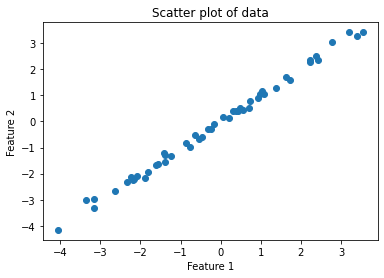

In [52]:
data_3=pd.read_csv('data3.csv',header=None)
C=covariance_matrix(data_3)
V=data_3.to_numpy()
plt.scatter(data_3[0],data_3[1])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of data')
print('Covariance matrix of data is \n',C)

**(3c) Apply PCA to transform data by retaining only 1 PC. Now, visualize the data points in transformed 1-dimensional space**

Text(0.5, 1.0, 'Transformed 1-D plot')

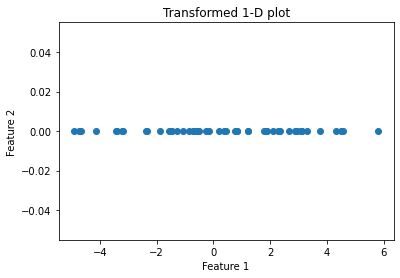

In [53]:
values, vectors = np.linalg.eig(C)
transformed_data=pd.DataFrame(np.matmul(vectors[:,1],V.transpose()))
plt.scatter(transformed_data[0],np.zeros(50))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Transformed 1-D plot')

**(3d) Compute the representational loss (with respect to the original data).**

**(3e) Compare the above representation loss with the loss your would incur if you attempted a one-dimensional representation without any transformation. Comment on it.**


Loss of data after PCA is 1-(data retained). Which is 1-(highest eigen value)/(sum of eigen values)




In [58]:
(1-((values[1])/(sum(values))))*100

0.11592757518344987

Representation loss after attempting one-dimensional representation

In [59]:
(min([(data_3[0]**2).sum(),(data_3[0]**2).sum()])/sum([(data_3[0]**2).sum(),(data_3[0]**2).sum()]))*100

50.0

**Observations:**

1.   The representation loss percentage incurred after performing PCA is much less than the loss occured due to one-dimensional representation without any transformation.(0.115% << 50%)
2.   Hence, PCA is preferred for data reduction, without losing much of the information.



### Application of PCA on real dataset

**(4a) Load the human face data set from sklearn (fetch_lfw_people).**

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

**(4b) Apply PCA on the faces data (sklearn can be used). Take the top 150 features from PCA. Reconstruct the images with the these 150 features and visualise them. Give your observations.**

In [ ]:
faces.images.shape

(1348, 62, 47)

Data Generation

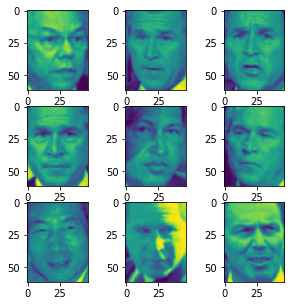

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
a=[]
for i in range(1348):
  img=faces.images[i].flatten()
  a.append(img)

face=pd.DataFrame(a)
plt.figure(figsize=(5,5))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(faces.images[i])

Top 150 features:

In [ ]:
from sklearn.decomposition import PCA
faces_pca = PCA(n_components=150)
faces_pca.fit(face)

PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Reconstruction of the images using 150 features

In [ ]:
components = faces_pca.transform(face)
projected = faces_pca.inverse_transform(components)

### Visualizations

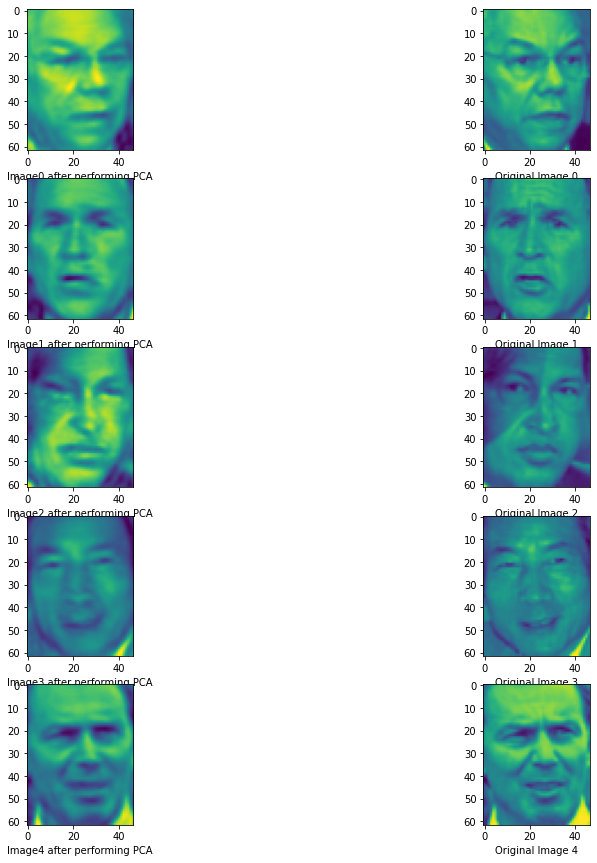

In [ ]:
plt.figure(figsize=(15,15))
for i in range(0,10,2):
  plt.subplot(5,2,i+1)
  plt.imshow(projected[i].reshape(62,47))
  plt.xlabel('Image'+str(int(i/2))+' after performing PCA')
  plt.subplot(5,2,i+2)
  plt.imshow(faces.images[i])
  plt.xlabel('Original Image '+str(int(i/2)))

## Observations:
1) We can see that the image generated after PCA with 150 principal features is somewhat blur compared to the original image. This is because the 150 features cannot explain complete variance in the image data.  

### 5) Cross validation to select parameters for Ridge Regression 

$$\hat{\theta} = argmin_{\theta}((y - X\theta)^\top(y - X\theta) + \lambda \theta^\top \theta)$$


Perform ridge rigression using gradient descent on the data 4 provided. (You can use sklearn)

Try to fit the data with polynomial of degree 3 and 

- For $\lambda$ choose from = [10,100,1000]
- choose learning rate (here it is $\alpha$)= [ 0.01,0.001,0.0001]
- max_iters = 1000

Choose the best combination of $\lambda$ and $\alpha$ using 5-fold cross validation on the dataset provided and report the same.


In [40]:
from sklearn.linear_model import SGDRegressor,Ridge,RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold, cross_val_score
data=pd.read_csv('data_X.txt',header=None,delimiter=r"\s+")
import warnings
warnings.filterwarnings("ignore")
X=data.drop(13,axis=1)
y=data[13]
poly = PolynomialFeatures(3)
X=poly.fit_transform(X)
mean_error={}
for i in [10,100,1000]:
  ridge=Ridge(alpha=i)
  kfold=KFold(n_splits=5)
  mean_error[i]=(np.mean(cross_val_score(ridge, X, y, cv=kfold,scoring='neg_mean_squared_error')))
mean_error

{10: -40677.19799447858, 100: -96880.45126333686, 1000: -48839.701973464355}

**Observations:**

The least error is found for the lambda value of 10. Hence, the best value for lambda is 10.